### Step:1 Data import & Library

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [11]:
df = pd.read_csv(r"C:\Users\Suresh\Downloads\archive (4)\ClusteringHSS.csv")
df

,ID,Gender_Code,Region,Income,Spending
0,1,Female,Rural,20.0,15.0
1,2,Male,Rural,5.0,12.0
2,3,Female,Urban,28.0,18.0
3,4,Male,Urban,40.0,10.0
4,5,Male,Urban,42.0,9.0
...,...,...,...,...,...
1108,1109,Female,Urban,33.0,16.0
1109,1110,Male,Urban,48.0,7.0
1110,1111,Male,Urban,31.0,16.0
1111,1112,Male,Urban,50.0,14.0


In [15]:
df.shape

(1113, 5)

### Step 2 :- Take specific Variable for Analysis

In [41]:
data = df.iloc[:, 3:5].values
data[0:2]

array([[20., 15.],
       [ 5., 12.]])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1113 non-null   int64  
 1   Gender_Code  1107 non-null   object 
 2   Region       1107 non-null   object 
 3   Income       1107 non-null   float64
 4   Spending     1108 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 43.6+ KB


In [40]:
df.isna().sum()

ID             0
Gender_Code    6
Region         6
Income         0
Spending       0
dtype: int64

In [39]:
df.Income.fillna(df.Income.mean(),inplace=True)
df.Spending.fillna(df.Spending.mean(),inplace=True)

# Step 3 :-  Dendogram 

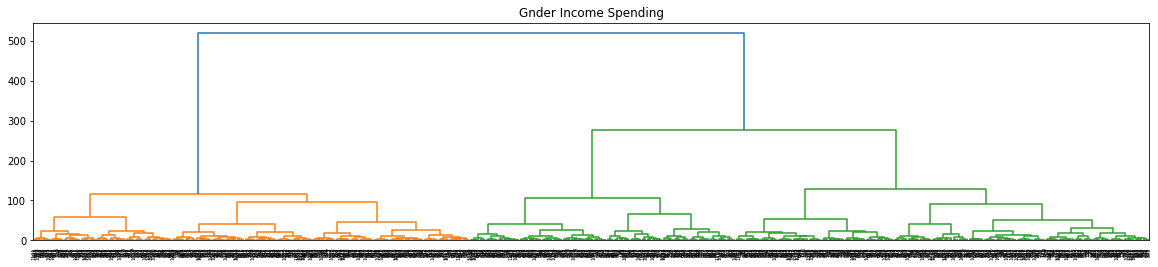

In [42]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20,4))
plt.title('Gender Income Spending')
dend = shc.dendrogram(shc.linkage(data,method='ward',metric='euclidean'))

In [43]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward') # ward = minimum

In [44]:
df['Group'] = cluster.fit_predict(data)
df

,ID,Gender_Code,Region,Income,Spending,Group
0,1,Female,Rural,20.0,15.0,1
1,2,Male,Rural,5.0,12.0,1
2,3,Female,Urban,28.0,18.0,0
3,4,Male,Urban,40.0,10.0,2
4,5,Male,Urban,42.0,9.0,2
...,...,...,...,...,...,...
1108,1109,Female,Urban,33.0,16.0,0
1109,1110,Male,Urban,48.0,7.0,2
1110,1111,Male,Urban,31.0,16.0,0
1111,1112,Male,Urban,50.0,14.0,2


C:\Users\Suresh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='Spending'>

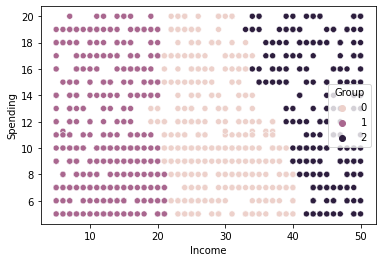

In [47]:
import seaborn as sns
sns.scatterplot(df['Income'],df['Spending'],
                hue='Group',
                data=df)
#                ,palette="gist_gray_r")

In [48]:
df

,ID,Gender_Code,Region,Income,Spending,Group
0,1,Female,Rural,20.0,15.0,1
1,2,Male,Rural,5.0,12.0,1
2,3,Female,Urban,28.0,18.0,0
3,4,Male,Urban,40.0,10.0,2
4,5,Male,Urban,42.0,9.0,2
...,...,...,...,...,...,...
1108,1109,Female,Urban,33.0,16.0,0
1109,1110,Male,Urban,48.0,7.0,2
1110,1111,Male,Urban,31.0,16.0,0
1111,1112,Male,Urban,50.0,14.0,2


In [50]:
df.Group.value_counts()

1    435
0    413
2    265
Name: Group, dtype: int64

In [52]:
np.sum(df.Group.value_counts(ascending=False).tolist())

1113

In [55]:
final_df = df.loc[:,['ID','Group']]
final_df

,ID,Group
0,1,1
1,2,1
2,3,0
3,4,2
4,5,2
...,...,...
1108,1109,0
1109,1110,2
1110,1111,0
1111,1112,2
